<a href="https://colab.research.google.com/github/furtman/WQTC25_workshop_IMTR/blob/main/Ex_geospatial/water_quality_visualization_Python_YK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCW01: From Data Management to Data Analysis — A Technical Deep-Dive**
AWWA WQTC 2025, November 9-13th, Tacoma WA
## **Water Quality Data Visualization using Google Colab and Python**

---

This notebook walks through building and running an interactive data visualization dashboard inside a **Google Colab** workspace using the **Python** programming language. Users will learn how to load, inspect, and analyze data from comma-separated (.csv) files, generate static and interactive visualizations of time-series plots and maps, and compile visualizations and stats into a PDF report and an easy-to-use dashboard that synthesizes data into single webpage.

The water quality data used in this notebook can be downloaded directly from the Thurston County Streams Water Quality Dashboard: https://www.thurstoncountywa.gov/streams-water-quality-dashboard

This link will take you to an example of a fully-functional, web-based data dashboard that was created using R (another popular programming langauge used for data science).


### 🌎 Notebook Table of Contents:
1.   Setup Python Runtime
2.   Load Python Libraries
3.   Upload Data Files to Google Colab
4.   Load and Inspect Data
5.   Data Cleaning and Processing
6.   Generating Summary Statistics
7.   Generating Plots
8.   Generating Multiple Plots and PDF Reports
9.   Generating Maps

### 💪 Helpful keyboard shortcuts:
*   `ctrl enter`: Runs a code cell
*   `ctrl shift enter`: Runs a code cell and advances to next cell
*   `ctrl shift enter w/ selection`: Runs the selected code within a code cell








---
## 1. Setup Python Runtime
Prior to installing any libraries/packages, change the **runtime type** to **Python 3** if it isn't already selected. Google Colab comes with several popular python packages pre-installed, such as *pandas* and *matplotlib*.



---
## 2. Load Python Libraries
In order to use the functions within each library, we need to load them into the notebook.

In [2]:
# Load in the Python libraries that will be used in this notebook
# Tip: Hover over the libraries to view more info about them
from google.colab import files                       # for uploading/downloading files in Colab
import pandas as pd                                  # data manipulation and analysis
import matplotlib.pyplot as plt                      # plotting static graphs
from scipy.stats import linregress                   # linear regression and statistical functions
import plotly.express as px                          # interactive plots and dashboards
from matplotlib.backends.backend_pdf import PdfPages # save multiple matplotlib plots to a PDF
import numpy as       np                               # numerical operations, arrays, and math functions

---
## 3. Upload Files to Google Colab
Since Google Colab is run on Linux-based cloud machines, we need to transfer the files from our PC (Windows, macOS, etc.) to the Google Colab workspace. Prior to running to next code cell, download the two data files from the GitHub code repository: https://github.com/furtman/WQTC25_workshop_IMTR/tree/main/Ex_geospatial/Data

In [3]:
# Choose files to upload; By default, uploaded files are saved in the "Files/content/" folder within the Google Colab workspace
# from google.colab import files
uploaded_files = files.upload()

Saving wqp_data.csv to wqp_data.csv
Saving streams_sites.csv to streams_sites.csv


---
## 4. Load and Inspect Data
Read in the CSV files to the notebook as variables called `sites` and `wq_data`.

In [4]:
# Read in stream site location data and inspect
# import pandas as pd
sites = pd.read_csv("streams_sites.csv")
print('This is the stream site location data:') # output a message to the console
sites # show data

This is the stream site location data:


,gid,SITE_CODE,SITE_NAME,Metro_ID,LAT,LON,AquaticLifeUse
0,1202.0,EH-BUDAD0000,Adams Creek South Fork @ Boston Harbor Road NE,EH-BUDAD0000,47.09789,-122.88697,Core Summer Salmonid Habitat
1,1140.0,EH-DESAY0400,Ayer (Elwanger) Creek @ near Sienna Dr SE,EH-DESAY0400,46.97410,-122.86115,Core Summer Salmonid Habitat
2,NaN,EH-BLABE0700,Beaver Creek @ Littlerock Road SW,EH-BLABE0700,46.89754,-123.02002,"Salmonid Spawning, Rearing, and Migration"
3,NaN,EH-BUDBD0000,Black Lake Ditch @ RW Johnson Blvd SW,EH-BUDBD0000,47.02730,-122.93936,"Salmonid Spawning, Rearing, and Migration"
4,NaN,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave SW 45b_gage,Black River @ 128th Ave. SW (45b),46.90176,-123.02375,Core Summer Salmonid Habitat
...,...,...,...,...,...,...,...
112,1191.0,EH-HENWL0099,Woodland Creek @ RR bridge nr Union Mills Road SE,EH-HENWL0099,47.03529,-122.78244,Core Summer Salmonid Habitat
113,1216.0,EH-HENWL0010,Woodland Creek @ upstream Quail Creek nr Holly...,EH-HENWL0010,47.07813,-122.82223,Core Summer Salmonid Habitat
114,1192.0,EH-HENWL0800,Woodland Creek Tanglewilde Outfall @ Martin Way,EH-HENWL0800,47.04972,-122.80167,Core Summer Salmonid Habitat
115,995.0,GAGE0035,Yelm Creek mouth @ Harry Peterson Farm 05b_gage,GAGE0035,46.97050,-122.62762,Core Summer Salmonid Habitat


## 🛑 Task 1: Read in water quality data and inspect

In [5]:
# Task 1: Read in water quality data as a variable named "wq_data"
wq_data = pd.read_csv("wqp_data.csv")
print("This is the water quality data associated with each stream site:")
wq_data

This is the water quality data associated with each stream site:


,Unnamed: 0,SITE_CODE,Metro_ID,date_time,value,unit,parameter,method,mdl,matrix,qualifier,dup,gid,SITE_NAME,sample_utc_offset,pql,lab_batch,depth_m
0,1,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),6/16/2020 9:50,0.202000,mg/L,Nitrate + Nitrite,353.2,0.010,NaN,NaN,Sample-Routine,NaN,Black River @ 128th Ave SW 45b_gage,NaN,NaN,NaN,NaN
1,2,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2/7/2022 9:05,0.017900,mg/L,Phosphorus,4500-P-F,0.005,NaN,NaN,Sample-Routine,NaN,Black River @ 128th Ave SW 45b_gage,NaN,NaN,NaN,NaN
2,3,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),8/3/2023 11:15,19.550000,deg C,"Temperature, water",TEMPTHERM,NaN,NaN,NaN,Field Msr/Obs,NaN,Black River @ 128th Ave SW 45b_gage,NaN,NaN,NaN,NaN
3,4,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),1/11/2023 8:45,1.690000,FNU,Turbidity,TURBM,NaN,NaN,NaN,Field Msr/Obs,NaN,Black River @ 128th Ave SW 45b_gage,NaN,NaN,NaN,NaN
4,5,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2/8/2023 8:55,10.040000,mg/L,Dissolved oxygen (DO),DO-OPTICAL,NaN,NaN,NaN,Field Msr/Obs,NaN,Black River @ 128th Ave SW 45b_gage,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81939,81940,Spurgeon Creek @ Rich Road bridge (14a),Spurgeon Creek @ Rich Road bridge (14a),7/13/2015,9.740000,mg/L,Dissolved oxygen (DO),See_external_files,NaN,Surface Water,NaN,Field Msr/Obs,NaN,Spurgeon Creek @ Rich Road SE_14a,NaN,NaN,NaN,NaN
81940,81941,Spurgeon Creek @ Rich Road bridge (14a),Spurgeon Creek @ Rich Road bridge (14a),12/9/2020,8.455999,deg C,"Temperature, water",TEMPTHERM,NaN,Surface Water,NaN,Field Msr/Obs,NaN,Spurgeon Creek @ Rich Road SE_14a,NaN,NaN,NaN,NaN
81941,81942,Spurgeon Creek @ Rich Road bridge (14a),Spurgeon Creek @ Rich Road bridge (14a),2/26/2019,7.240000,NaN,pH,PHMETER,NaN,Surface Water,NaN,Field Msr/Obs,NaN,Spurgeon Creek @ Rich Road SE_14a,NaN,NaN,NaN,NaN
81942,81943,Spurgeon Creek @ Rich Road bridge (14a),Spurgeon Creek @ Rich Road bridge (14a),2/9/2015,0.042000,mg/L,Phosphorus,See_external_files,NaN,Surface Water,NaN,Sample-Routine,NaN,Spurgeon Creek @ Rich Road SE_14a,NaN,NaN,NaN,NaN


In [6]:
# Show some general info about the data types of each column in the water quality data
wq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81944 entries, 0 to 81943
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         81944 non-null  int64  
 1   SITE_CODE          81944 non-null  object 
 2   Metro_ID           81944 non-null  object 
 3   date_time          81944 non-null  object 
 4   value              80147 non-null  float64
 5   unit               71666 non-null  object 
 6   parameter          81944 non-null  object 
 7   method             80033 non-null  object 
 8   mdl                7207 non-null   float64
 9   matrix             71277 non-null  object 
 10  qualifier          3996 non-null   object 
 11  dup                81944 non-null  object 
 12  gid                25229 non-null  float64
 13  SITE_NAME          81944 non-null  object 
 14  sample_utc_offset  0 non-null      float64
 15  pql                0 non-null      float64
 16  lab_batch          0 n

In [7]:
# Show the unique stream site locations and parameter names
print("The unique stream site locations are:", sites['SITE_NAME'].unique())
print("\n") # add a line break so it's easier to see the different outputs
print("The unique parameter names are:", wq_data['parameter'].unique())

The unique stream site locations are: ['Adams Creek South Fork @ Boston Harbor Road NE'
 'Ayer (Elwanger) Creek @ near Sienna Dr SE'
 'Beaver Creek @ Littlerock Road SW'
 'Black Lake Ditch @  RW Johnson Blvd SW'
 'Black River @ 128th Ave SW 45b_gage' 'Black River @ Howanut Road'
 'Black River @ Johnsons dock nr fmr  Trestle Bridge Holm-Laymon Roads SW'
 'Black River @ Moon Road'
 'Black River @ Shaner Creek mouth nr Canoe Club'
 'Black River RM 10.7 @ Swecker Salmon Farm Dock nr Wheat Street SW'
 'Blooms Ditch @ 110th Ave SW' 'Burns Creek @ Ellison Loop NW'
 'Burns Creek mouth @ Totten Inlet' 'Butler Creek @ French Loop Road NW'
 'Capitol Lake @ Marathon Park Railroad Bridge'
 'Chambers Creek @ End of 58th Ave SE'
 'Chehalis River @ Independence Road SW'
 'Chehalis River @ Prather Road SW' 'Dempsey Creek @ Delphi Road'
 'Deschutes @ Tumwater Falls Park' 'Deschutes @ Waldrick'
 'Deschutes River @ Deschutes Falls Park'
 'Deschutes River @ Henderson Blvd SE' 'Deschutes River @ Rich Road'


---
## 5. Data Cleaning and Processing

In [8]:
# In order to conduct timeseries analysis and plot the WQ data, we need to change the 'date_time' column to a datetime data type and sort by date
wq_data['date_time_new'] = pd.to_datetime(wq_data['date_time'], format='mixed')
wq_data = wq_data.sort_values(by='date_time_new') # sort values by datetime
wq_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81944 entries, 53728 to 17218
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         81944 non-null  int64         
 1   SITE_CODE          81944 non-null  object        
 2   Metro_ID           81944 non-null  object        
 3   date_time          81944 non-null  object        
 4   value              80147 non-null  float64       
 5   unit               71666 non-null  object        
 6   parameter          81944 non-null  object        
 7   method             80033 non-null  object        
 8   mdl                7207 non-null   float64       
 9   matrix             71277 non-null  object        
 10  qualifier          3996 non-null   object        
 11  dup                81944 non-null  object        
 12  gid                25229 non-null  float64       
 13  SITE_NAME          81944 non-null  object        
 14  sample_

In [15]:
# In order to conduct geospatial analysis and generate maps, we need to join/merge the WQ data with the stream site location data
merged_data = pd.merge(
    wq_data,
    sites[['SITE_NAME', 'LAT', 'LON', 'AquaticLifeUse']], # keep only the site name, latitude, longitude, and aquatic life use columns
    on='SITE_NAME', # merge the dataframes based on a common column
    how='left' # keep all rows in the wq_data and only matching rows in the sites data
)

merged_data.columns # show the dataframe column names

Index(['Unnamed: 0', 'SITE_CODE', 'Metro_ID', 'date_time', 'value', 'unit',
       'parameter', 'method', 'mdl', 'matrix', 'qualifier', 'dup', 'gid',
       'SITE_NAME', 'sample_utc_offset', 'pql', 'lab_batch', 'depth_m',
       'date_time_new', 'LAT', 'LON', 'AquaticLifeUse'],
      dtype='object')

In [16]:
# Store initial count
rows_before = len(merged_data)
print(f"Rows before: {rows_before}")

# Drop rows where ALL values are missing
merged_data = merged_data.dropna(how='all')

# Print rows after
rows_after = len(merged_data)
print(f"Rows after: {rows_after}")
print(f"Rows dropped: {rows_before - rows_after}")

Rows before: 81944
Rows after: 81944
Rows dropped: 0


---
## 6. Generating Summary Statistics

In [10]:
# Generate some basic summary stats of observed WQ values for each site and parameter pairing
summary_stats = merged_data.groupby(['SITE_NAME', 'parameter'])['value'].agg(['count','mean','median','min','max']).reset_index()
summary_stats

,SITE_NAME,parameter,count,mean,median,min,max
0,Adams Creek South Fork @ Boston Harbor Road NE,Ammonia-nitrogen,2,0.024500,0.02450,0.023000,0.026000
1,Adams Creek South Fork @ Boston Harbor Road NE,Dissolved oxygen (DO),11,11.250000,11.83000,8.750000,12.820000
2,Adams Creek South Fork @ Boston Harbor Road NE,Fecal Coliform,11,376.272727,40.00000,10.000000,3224.000000
3,Adams Creek South Fork @ Boston Harbor Road NE,Flow,10,0.854000,0.28500,0.010000,3.120000
4,Adams Creek South Fork @ Boston Harbor Road NE,Nitrate + Nitrite,11,0.798364,0.48300,0.181000,1.610000
...,...,...,...,...,...,...,...
1037,Yelm mouth,Phosphorus,41,0.022878,0.02000,0.016000,0.058000
1038,Yelm mouth,"Temperature, water",39,10.406923,10.61000,4.920000,13.090000
1039,Yelm mouth,"Total Phosphorus, mixed forms",18,0.019295,0.01719,0.012067,0.058812
1040,Yelm mouth,Turbidity,39,0.851282,0.60000,0.000000,3.000000


In [11]:
# View summary stats for a specific site
summary_stats[summary_stats['SITE_NAME'] == 'Deschutes @ Tumwater Falls Park']

,SITE_NAME,parameter,count,mean,median,min,max
193,Deschutes @ Tumwater Falls Park,Ammonia-nitrogen,38,0.030316,0.021500,0.011,0.182000
194,Deschutes @ Tumwater Falls Park,Dissolved oxygen (DO),297,11.171186,11.220000,8.260,14.800000
195,Deschutes @ Tumwater Falls Park,Escherichia coli,13,46.076923,31.000000,4.000,228.000000
196,Deschutes @ Tumwater Falls Park,Fecal Coliform,255,63.647059,20.000000,4.000,1745.000000
197,Deschutes @ Tumwater Falls Park,Flow,204,483.857843,314.500000,45.000,3890.000000
198,Deschutes @ Tumwater Falls Park,Nitrate + Nitrite,306,0.697610,0.677000,0.244,1.743895
199,Deschutes @ Tumwater Falls Park,Phosphorus,293,0.037794,0.028000,0.013,0.324000
200,Deschutes @ Tumwater Falls Park,Specific conductance,236,109.413136,109.750000,43.000,161.800003
201,Deschutes @ Tumwater Falls Park,"Temperature, water",301,10.815066,9.870000,1.980,20.490000
202,Deschutes @ Tumwater Falls Park,"Total Phosphorus, mixed forms",28,0.036940,0.026126,0.012,0.135088


---

## 7. Generating Plots

## Statistical Display of Data (may inform further data cleaning)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_and_check_outliers(df, site_name, parameter):
    """
    Create box plot with scatter dots and recommend data censoring for outliers.

    Parameters:
    - df: pandas DataFrame with columns ['SITE_NAME', 'parameter', 'value']
    - site_name: specific site to visualize
    - parameter: specific parameter to visualize
    """
    # Filter data
    data = df[(df['SITE_NAME'] == site_name) & (df['parameter'] == parameter)]['value']

    if len(data) == 0:
        print(f"No data found for {site_name} - {parameter}")
        return

    # Calculate quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    # Create plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Box plot
    bp = ax.boxplot(data, vert=True, patch_artist=True, widths=0.3)
    bp['boxes'][0].set_facecolor('lightblue')

    # Scatter dots
    x = [1] * len(data)
    ax.scatter(x, data, alpha=0.5, s=30, color='navy')

    # Highlight outliers
    if len(outliers) > 0:
        outlier_x = [1] * len(outliers)
        ax.scatter(outlier_x, outliers, alpha=0.7, s=50, color='red',
                   label=f'Outliers (n={len(outliers)})')

    ax.set_ylabel('Value')
    ax.set_title(f'{site_name} - {parameter}')
    ax.set_xticks([1])
    ax.set_xticklabels([parameter])
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print recommendations
    print(f"\n{'='*60}")
    print(f"Site: {site_name} | Parameter: {parameter}")
    print(f"{'='*60}")
    print(f"Total observations: {len(data)}")
    print(f"Q1 (25th percentile): {Q1:.2f}")
    print(f"Median (50th percentile): {data.median():.2f}")
    print(f"Q3 (75th percentile): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower bound (Q1 - 1.5*IQR): {lower_bound:.2f}")
    print(f"Upper bound (Q3 + 1.5*IQR): {upper_bound:.2f}")

    if len(outliers) > 0:
        print(f"\n⚠️  OUTLIERS DETECTED: {len(outliers)} values ({len(outliers)/len(data)*100:.1f}%)")
        print(f"Outlier range: {outliers.min():.2f} to {outliers.max():.2f}")
        print(f"\n📋 RECOMMENDED DATA CENSORING:")
        print(f"   - Consider removing values < {lower_bound:.2f}")
        print(f"   - Consider removing values > {upper_bound:.2f}")
        print(f"   - Or flag these values for manual review")
    else:
        print(f"\n✅ No outliers detected - data appears normally distributed")
    print(f"{'='*60}\n")


/tmp/ipython-input-3089736609.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


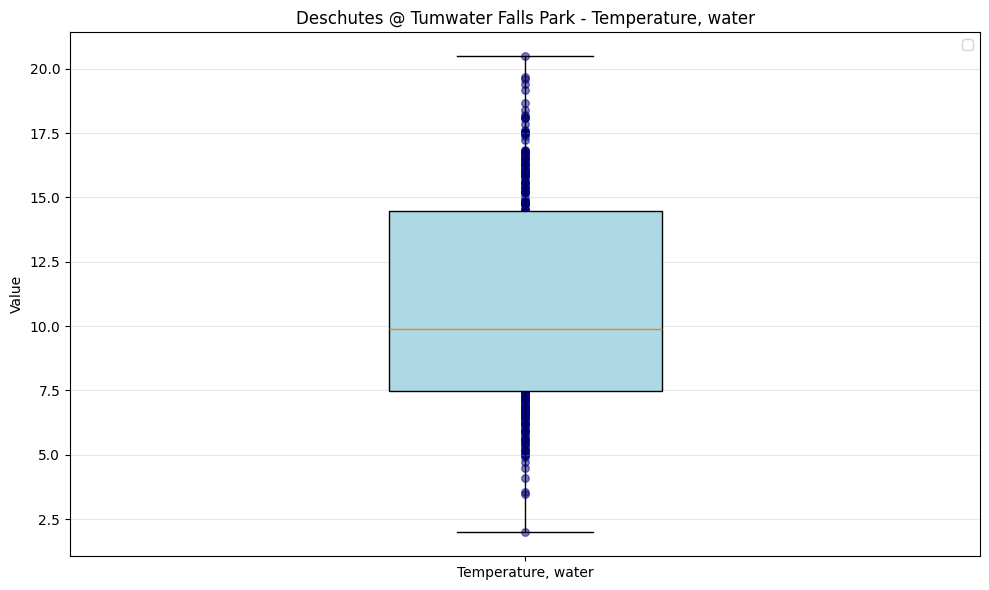


Site: Deschutes @ Tumwater Falls Park | Parameter: Temperature, water
Total observations: 301
Q1 (25th percentile): 7.47
Median (50th percentile): 9.87
Q3 (75th percentile): 14.48
IQR: 7.01
Lower bound (Q1 - 1.5*IQR): -3.05
Upper bound (Q3 + 1.5*IQR): 25.00

✅ No outliers detected - data appears normally distributed



In [21]:
# Example usage:
site_name = 'Deschutes @ Tumwater Falls Park'
param_name = 'Temperature, water'
visualize_and_check_outliers(merged_data, site_name, param_name)

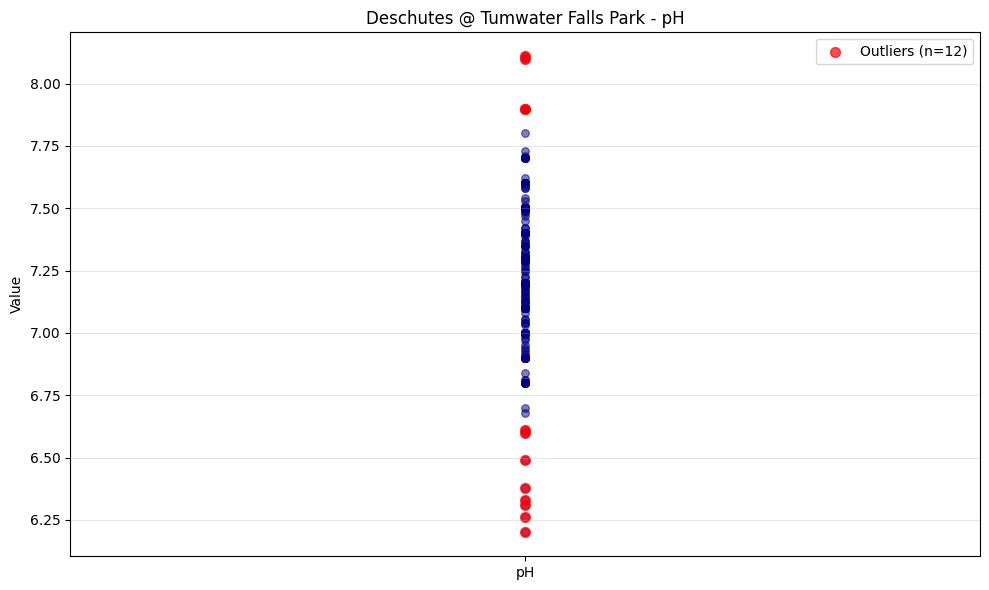


Site: Deschutes @ Tumwater Falls Park | Parameter: pH
Total observations: 300
Q1 (25th percentile): 7.10
Median (50th percentile): 7.20
Q3 (75th percentile): 7.40
IQR: 0.30
Lower bound (Q1 - 1.5*IQR): 6.65
Upper bound (Q3 + 1.5*IQR): 7.85

⚠️  OUTLIERS DETECTED: 12 values (4.0%)
Outlier range: 6.20 to 8.11

📋 RECOMMENDED DATA CENSORING:
   - Consider removing values < 6.65
   - Consider removing values > 7.85
   - Or flag these values for manual review



In [20]:

# Example usage:
site_name = 'Deschutes @ Tumwater Falls Park'
param_name = 'pH'
visualize_and_check_outliers(merged_data, site_name, param_name)

### Static Plots

In [12]:
# Generate a timeseries plot of a WQ parameter for a specific site

# Filter the data for a specific site name and parameter (e.g., water temperature)
site_name = 'Deschutes @ Tumwater Falls Park'
param_name = 'Temperature, water'

site_temp_data = merged_data[ # filter out data for specific parameter and site
    (merged_data['SITE_NAME'] == site_name) &
    (merged_data['parameter'] == param_name)
    ].copy() # save to a new dataframe

site_temp_data = site_temp_data.sort_values(by='date_time_new') # sort the data by date/time
site_temp_data

,Unnamed: 0,SITE_CODE,Metro_ID,date_time,value,unit,parameter,method,mdl,matrix,...,gid,SITE_NAME,sample_utc_offset,pql,lab_batch,depth_m,date_time_new,LAT,LON,AquaticLifeUse
3951,35018,EH-DESDE0000,EH-DESDE0000,1/29/1992,9.000,deg C,"Temperature, water",See_external_files,NaN,Surface Water,...,NaN,Deschutes @ Tumwater Falls Park,NaN,NaN,NaN,NaN,1992-01-29 00:00:00,47.01412,-122.90334,"Salmonid Spawning, Rearing, and Migration"
4245,36043,EH-DESDE0000,EH-DESDE0000,2/25/1992,9.500,deg C,"Temperature, water",See_external_files,NaN,Surface Water,...,NaN,Deschutes @ Tumwater Falls Park,NaN,NaN,NaN,NaN,1992-02-25 00:00:00,47.01412,-122.90334,"Salmonid Spawning, Rearing, and Migration"
4342,34823,EH-DESDE0000,EH-DESDE0000,3/24/1992,9.900,deg C,"Temperature, water",See_external_files,NaN,Surface Water,...,NaN,Deschutes @ Tumwater Falls Park,NaN,NaN,NaN,NaN,1992-03-24 00:00:00,47.01412,-122.90334,"Salmonid Spawning, Rearing, and Migration"
4833,36111,EH-DESDE0000,EH-DESDE0000,7/28/1992,16.500,deg C,"Temperature, water",See_external_files,NaN,Surface Water,...,NaN,Deschutes @ Tumwater Falls Park,NaN,NaN,NaN,NaN,1992-07-28 00:00:00,47.01412,-122.90334,"Salmonid Spawning, Rearing, and Migration"
5252,35642,EH-DESDE0000,EH-DESDE0000,8/25/1992,14.000,deg C,"Temperature, water",See_external_files,NaN,Surface Water,...,NaN,Deschutes @ Tumwater Falls Park,NaN,NaN,NaN,NaN,1992-08-25 00:00:00,47.01412,-122.90334,"Salmonid Spawning, Rearing, and Migration"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81322,34338,EH-DESDE0000,EH-DESDE0000,11/5/2024 13:25,9.865,deg C,"Temperature, water",TEMPTHERM,NaN,NaN,...,NaN,Deschutes @ Tumwater Falls Park,NaN,NaN,NaN,NaN,2024-11-05 13:25:00,47.01412,-122.90334,"Salmonid Spawning, Rearing, and Migration"
81510,34496,EH-DESDE0000,EH-DESDE0000,12/10/2024 13:00,6.424,deg C,"Temperature, water",TEMPTHERM,NaN,NaN,...,NaN,Deschutes @ Tumwater Falls Park,NaN,NaN,NaN,NaN,2024-12-10 13:00:00,47.01412,-122.90334,"Salmonid Spawning, Rearing, and Migration"
81652,36242,EH-DESDE0000,EH-DESDE0000,1/8/2025 12:50,7.596,deg C,"Temperature, water",TEMPTHERM,NaN,NaN,...,NaN,Deschutes @ Tumwater Falls Park,NaN,NaN,NaN,NaN,2025-01-08 12:50:00,47.01412,-122.90334,"Salmonid Spawning, Rearing, and Migration"
81809,34858,EH-DESDE0000,EH-DESDE0000,2/11/2025 13:00,4.481,deg C,"Temperature, water",TEMPTHERM,NaN,NaN,...,NaN,Deschutes @ Tumwater Falls Park,NaN,NaN,NaN,NaN,2025-02-11 13:00:00,47.01412,-122.90334,"Salmonid Spawning, Rearing, and Migration"


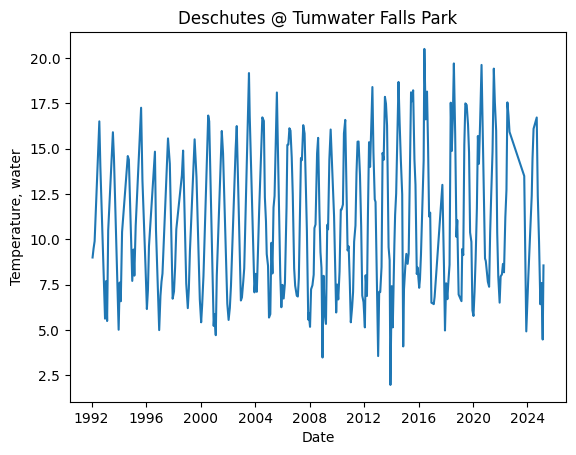

In [13]:
# Basic line plot
# import matplotlib.pyplot as plt
plt.plot(site_temp_data['date_time_new'], site_temp_data['value']) # x, y
plt.xlabel('Date') # x-axis label
plt.ylabel(param_name) # y-axis label
plt.title(site_name) # plot title
plt.show()

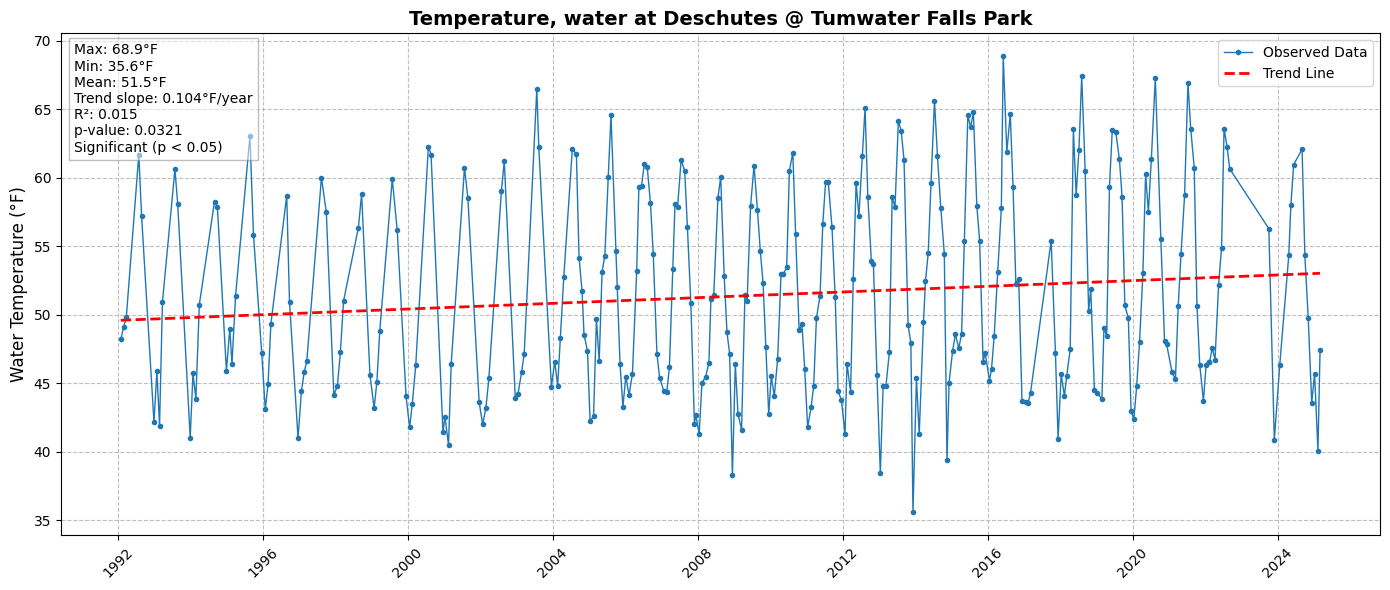

In [14]:
# Even fancier plot with summary stats and trend line
# from scipy.stats import linregress

# Convert temperature from C to F
site_temp_data['value_F'] = site_temp_data['value'] * 9/5 + 32

# Calculate stats
mean_temp = site_temp_data['value_F'].mean()
min_temp = site_temp_data['value_F'].min()
max_temp = site_temp_data['value_F'].max()

# Linear regression for trend
# x as ordinal dates
x = site_temp_data['date_time_new'].map(lambda dt: dt.toordinal())
y = site_temp_data['value_F']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate trend line y values
slope_per_year = slope * 365.25 # convert to per year
trend_line = slope * x + intercept

# Compute R² and p-value significance
r_squared = r_value ** 2
if p_value < 0.05:
  significance = "Significant (p < 0.05)"
else:
  significance = "Not Significant (p > 0.05)"
#significance = "Significant" if p_value < 0.05 else "Not Significant" # how the cool kids do it

# List of stats that will be added to the plot
stats_text = (
    f"Max: {max_temp:.1f}°F\n"
    f"Min: {min_temp:.1f}°F\n"
    f"Mean: {mean_temp:.1f}°F\n"
    f"Trend slope: {slope_per_year:.3f}°F/year\n"
    f"R²: {r_squared:.3f}\n"
    f"p-value: {p_value:.4f}\n"
    f"{significance}"
)

# Plotting
plt.figure(figsize=(14, 6)) # width, height
plt.plot(site_temp_data['date_time_new'], site_temp_data['value_F'], # x, y
         marker='o', markersize=3, # marker style
         linestyle='-', linewidth=1, # line style
         label='Observed Data') # legend label
plt.plot(site_temp_data['date_time_new'], trend_line, # trend line
         linestyle='--', linewidth=2, color='red', # line style
         label='Trend Line') # legend label

# Add stats to plot
plt.text(0.01, 0.98, stats_text, transform=plt.gca().transAxes,
         verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))

# Plot beautification
plt.grid(True, linestyle='--', alpha=0.8) # background grid
plt.title(f'{param_name} at {site_name}', fontsize=14, fontweight='bold') # plot title
plt.ylabel("Water Temperature (°F)", fontsize=12) # y-axis label
plt.xticks(rotation=45) # rotate the x-axis labels
plt.legend() # add legend
plt.tight_layout() # auto adjust spacing to prevent overlapping
plt.show()

### Interactive Plots

In [ ]:
# Generate a basic interactive plot of water temperature at every site on the Deschutes River
# import plotly.express as px

# Filter water temperature data and site names that begin with "Deschutes"
filtered_data = merged_data[
    (merged_data['parameter'] == param_name) & # 'Temperature, water'
    (merged_data['SITE_NAME'].str.startswith('Deschutes'))
    ].copy()

# Sort by datetime
filtered_data = filtered_data.sort_values(by='date_time_new')

# Plotting
fig = px.line(
    filtered_data,
    x='date_time_new', # x data
    y='value', # y data
    color='SITE_NAME', # symbolize site name by color
    title='Deschutes River Water Temperature'
)

# Layout styling for comparison
fig.update_layout(hovermode='x unified') # enables value hovering for easy comparison

fig.show()

In [ ]:
# Generate a fancy interactive plot of all WQ parameters at every site on the Deschutes River

# Filter site names that begin with "Deschutes" and sort by datetime
deschutes_data = merged_data[
    (merged_data['SITE_NAME'].str.startswith('Deschutes'))
    ].sort_values(by='date_time_new').copy()

# Plotting
fig_deschutes = px.line(
    deschutes_data,
    x='date_time_new',
    y='value',
    color='SITE_NAME',
    facet_col='parameter', # each parameter gets its own plot
    facet_col_wrap=3, # 3 plots per row
    title='Deschutes River Water Quality Parameters',
    height=800, # figure height
    labels={ # customize label names for data hover
        'date_time_new': 'Date',
        'value': 'Measured Value',
        'SITE_NAME': 'Site Name',
        'unit': 'Unit'
    },
    hover_data={ # customize label values for data hover
        'date_time_new': '|%m-%d-%Y', # reformat the datetime to mm/dd/yyyy
        'value': ':.2f', # value with 2 decimals
        'SITE_NAME': True, # inlcude site name in hover
        'unit': True,
        'parameter': False # do not include parameter name in hover
    }
)

# Improve layout styling
fig_deschutes.update_layout(
    hovermode='x unified',
    showlegend=True,
    legend_title_text='Site Name', # update the legend title
    title_font_size=18, # adjust plot title font size
    margin=dict(l=40, r=40, t=80, b=40) # adjust plot margins (left, right, top, bottom)
)

# Make each facet plot's y-axis values independent from each other (needed since parameters have different measurement units)
fig_deschutes.update_yaxes(title='', matches=None) # don't show y-axis label
fig_deschutes.update_xaxes(title='') # don't show x-axis label

# Clean up facet titles: remove "parameter_unit=" prefix
for annotation in fig_deschutes.layout.annotations:
    annotation.text = annotation.text.replace("parameter=", "")

fig_deschutes.show()

---
## 8. Generating Multiple Plots and PDF Reports
Up until this point, Excel would have been able to handle everything we just did (i.e., look at the data, filter by parameter and site, create plots). With Python (and programming in general), we can take this a step further by automating those redundant processes that are done in Excel. For example, we can write a script to plot a timeseries of all WQ parameters at each stream site location and then save to a PDF.

In [ ]:
# Generate a fancy, multi-facet plot of all WQ parameters for each stream site location and save to a single PDF (takes approx. 4-5 minutes to run)
# from matplotlib.backends.backend_pdf import PdfPages
# import numpy as np

# Toggle switch for running the cell
run_cell = False # True or False

# Output file
output_pdf = "WaterQuality_SiteParameter_Trends.pdf"

if run_cell:
  # Create PDF file to save all plots; each site gets a single PDF page
  with PdfPages(output_pdf) as pdf:
      # Loop through each site
      for site_name, site_df in merged_data.groupby('SITE_NAME'):
          parameters = site_df['parameter'].unique()

          # Setup multi-facet plot layout
          n_params = len(parameters)
          ncols = 2
          nrows = int(np.ceil(n_params / ncols))
          fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 4))
          axes = axes.flatten()

          # Loop through each parameter, apply regression, calculate stats, and plot
          for i, param_name in enumerate(parameters):
              ax = axes[i]
              param_df = site_df[site_df['parameter'] == param_name].copy()
              param_df = param_df.sort_values(by="date_time_new")

              # Convert temperature from C to F
              if "temp" in param_name.lower():
                  param_df['value_plot'] = param_df['value'] * 9/5 + 32
                  y_label = "Temperature (°F)"
              else:
                  param_df['value_plot'] = param_df['value']
                  y_label = f"{param_name} ({param_df['unit'].iloc[0] if 'unit' in param_df.columns else ''})"

              # Data for regression
              param_df = param_df.dropna(subset=['date_time_new', 'value_plot']) # remove NA values for regression analysis
              x = param_df['date_time_new'].map(lambda dt: dt.toordinal())
              y = param_df['value_plot']
              n_points = len(y)

              # Check data sufficiency
              if n_points >= 3:
                  slope, intercept, r_value, p_value, std_err = linregress(x, y)
                  slope_per_year = slope * 365.25
                  r_squared = r_value ** 2
                  trend_line = slope * x + intercept
                  significance = "Significant (p < 0.05)" if p_value < 0.05 else "Not Significant"
              else:
                  slope_per_year = np.nan
                  r_squared = np.nan
                  p_value = np.nan
                  trend_line = [np.nan] * len(x)
                  significance = "Insufficient data for regression"

              # Summary statistics
              mean_val = y.mean()
              min_val = y.min()
              max_val = y.max()

              # Stats text
              if np.isnan(p_value):
                  p_str = "N/A"
              else:
                  p_str = f"{p_value:.4f}"

              stats_text = (
                  f"n = {n_points}\n"
                  f"Max: {max_val:.1f}\n"
                  f"Min: {min_val:.1f}\n"
                  f"Mean: {mean_val:.1f}\n"
                  f"Trend: {slope_per_year:.3f}/yr\n"
                  f"R²: {r_squared:.3f}\n"
                  f"p: {p_str}\n"
                  f"{significance}"
              )

              # Plotting
              ax.plot(param_df['date_time_new'], y, marker='o', markersize=3,
                      linestyle='-', linewidth=1, label='Observed')
              ax.plot(param_df['date_time_new'], trend_line, linestyle='--',
                      linewidth=2, color='red', label='Trend')
              ax.text(0.01, 0.98, stats_text, transform=ax.transAxes, fontsize=9,
                      verticalalignment='top',
                      bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
              ax.set_title(f"{param_name}", fontsize=11, fontweight='bold')
              ax.set_ylabel(y_label)
              ax.grid(True, linestyle='--', alpha=0.6)
              ax.legend(fontsize=8)
              ax.tick_params(axis='x', rotation=45)

          # Remove unused subplots
          for j in range(i + 1, len(axes)):
              fig.delaxes(axes[j])

          # Layout and save
          fig.suptitle(f"Water Quality Trends at {site_name}", fontsize=14, fontweight='bold')
          plt.tight_layout(rect=[0, 0, 1, 0.96])
          pdf.savefig(fig)
          plt.close(fig)

  print(f"All plots saved to: {output_pdf}")

else:
  print("Skipping this cell.")

---
## 9. Generating Maps
Since the stream site location data has a latitude and longitude column, we can plot the locations on an interactive map.

In [ ]:
# Generate a basic location map of stream site locations

site_map = px.scatter_mapbox(
    sites, # stream site location data
    lat="LAT", # latitude column
    lon="LON", # longitude column
    hover_name="SITE_NAME", # popup label that appears when hovered over
    hover_data="AquaticLifeUse", # popup data that appears when hovered over
    title="Stream Site Monitoring Locations", # map title
    mapbox_style="open-street-map", # basemap; other options - "carto-positron", "carto-darkmatter"
)

site_map.show(config={'scrollZoom': True}) # show map (and enable scroll zoom for convience)

In [ ]:
# Generate a map showing the distribution of water temperature at stream site locations

# Filter out stream temperature data
stream_temp_data = merged_data[
    (merged_data['parameter'] == param_name) # 'Temperature, water'
    ].copy()

# Calculate monthly average stream temperature for all sites
stream_temp_data["year_month"] = stream_temp_data["date_time_new"].dt.to_period("M").dt.strftime("%Y-%m") # add a year_month column so we can group by month
monthly_avg_temp = (
    stream_temp_data
    .groupby(["SITE_NAME", "LAT", "LON", "year_month", "parameter", "unit"], as_index=False)
    .agg(mean_temp=("value", "mean"))
).sort_values(by="year_month")

# Find min and max stream temperautre values
vmin = monthly_avg_temp['mean_temp'].min()
vmax = monthly_avg_temp['mean_temp'].max()

# Plotting
stream_temp_map = px.scatter_mapbox(
    monthly_avg_temp,
    lat="LAT",
    lon="LON",
    color="mean_temp", # symbolize points by stream temp value
    range_color=(vmin, vmax), # color range based on min/max temp values
    animation_frame="year_month", # animate points by date/time
    hover_name="SITE_NAME",
    hover_data={
        "year_month": "|%Y-%m", # show datetime in hover
        "parameter": True, # show parameter
        "mean_temp": ":.2f", # show value with 2 decimals
        "unit": True, # show parameter unit
        "LAT": False, # DO NOT show LAT
        "LON": False # DO NOT show LONG
    },
    title="Stream Temperature at Monitoring Locations in Thurston County",
    height=800, # map height
    zoom=9, # set zoom level
    mapbox_style="carto-positron" # better basemap for viewing symbol colors
)

# Update map aesthetics
stream_temp_map.update_traces(marker=dict(size=12)) # increase size of points on map

stream_temp_map.show(config={'scrollZoom': True}) # show map (and enable scroll zoom for convience)

---
## 10. Generating Data Dashboards

In [ ]:
# Install packages that aren't preinstalled in Colab
!pip install dash

from dash import Dash, dcc, html, Input, Output

In [ ]:
#  Generate a data dashboard

# Get unique parameter names and sort alphabetically
param_options = sorted(merged_data["parameter"].dropna().unique())

# Initialize the app
app = Dash(__name__)

# App layout (User-Interface) --------------------------------------------------
app.layout = html.Div([
    # Dropdown menu
    html.Div([
        html.Label("Select Parameter:", style={"fontWeight": "bold"}),
        dcc.Dropdown(
            id="param",
            options=[{"label": p, "value": p} for p in param_options],
            value=param_options[0],
            clearable=False,
            style={"width": "100%"}
        ),
    ], style={"width": "25%", "margin": "10px"}),

    # Time-Series Plot and Map
    html.Div([
        html.Div([
            dcc.Graph(
                id="timeseries",
                style={"width": "100%", "height": "90vh"},
                config={"responsive": True}
            )
        ], style={"flex": "1.5"}),

        html.Div([
            dcc.Graph(
                id="map",
                style={"width": "100%", "height": "90vh"},
                config={"responsive": True}
            )
        ], style={"flex": "1"})
    ], style={
        "display": "flex",
        "flexDirection": "row",
        "width": "100%",
        "alignItems": "stretch",
    })
])

# Callback to update plot and map ----------------------------------------------
@app.callback(
    Output("timeseries", "figure"),
    Output("map", "figure"),
    Input("param", "value")
)

# Update plot and map based on user selection from dropdown menu
def update_dashboard(param):
    df = merged_data[merged_data["parameter"] == param].copy()
    df["year_month_dt"] = df["date_time_new"].dt.to_period("M").dt.to_timestamp()
    df["year_month"] = df["date_time_new"].dt.strftime("%Y-%m")

    # Monthly averages
    monthly_avg = (
        df.groupby(["SITE_NAME", "LAT", "LON", "year_month", "year_month_dt"], as_index=False)
          .agg(mean_value=("value", "mean"))
          .sort_values("year_month_dt")
    )

    ## Time-series line plot ---------------------------------------------------
    ts_fig = px.line(
        monthly_avg, x="year_month", y="mean_value", color="SITE_NAME",
        title=f"{param} — Monthly Trend by Site", height=800,
        category_orders={"SITE_NAME": sorted(monthly_avg["SITE_NAME"].unique())}
    )
    ts_fig.update_layout(
        autosize=True,
        xaxis_title="",
        margin=dict(t=50, l=20, r=20, b=100),
        legend=dict(
            orientation="h",
            yanchor="top",
            y=-0.2,
            xanchor="center",
            x=0.5,
            title=None,
            font=dict(size=10)
        )
    )


    ## Map (animated) ----------------------------------------------------------
    vmin, vmax = monthly_avg["mean_value"].min(), monthly_avg["mean_value"].max() # min and max of parameter data

    # Plotting
    map_fig = px.scatter_mapbox(
        monthly_avg, lat="LAT", lon="LON", color="mean_value",
        range_color=(vmin, vmax), animation_frame="year_month_dt",
        hover_name="SITE_NAME", mapbox_style="carto-positron",
        zoom=8, height=800
    )
    map_fig.update_traces(marker=dict(size=12))
    map_fig.update_layout(
        autosize=True,
        margin=dict(t=50, l=0, r=0, b=0),
        legend=dict(
            orientation="h",
            yanchor="top",
            y=0,
            xanchor="center",
            x=0.5,
            title=None
        )
    )

    return ts_fig, map_fig

# Run app ----------------------------------------------------------------------
app.run(mode="inline") # run app within Colab